# Logistic Regression - oneVsAll Multi Class Classification

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import loadmat

### load data

In [2]:
data=loadmat("ex3data1.mat")
X=data["X"]
y=data["y"]

### visualize hand written data

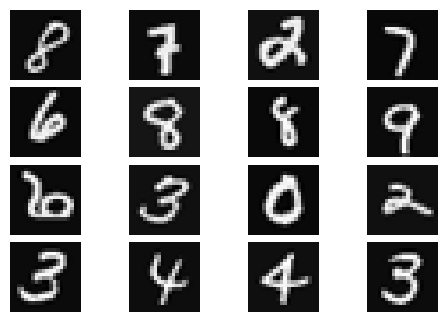

In [3]:
fig = plt.figure(dpi=100)

for i in range(16):
    plt.subplot(4, 4, i+1)
    # Each training example is 20 x 20 pixel grayscale we need to reshape them to 20 x 20 pixel
    plt.imshow(X.reshape(len(X),20,20,order="F")[np.random.randint(0,5001)], cmap='gray' ) 
    plt.axis('off')
plt.subplots_adjust(hspace = 0.1, wspace= 0.1)
plt.show()

### define sigmoid function

In [4]:
def sigmoid(z):
    g = np.size(z);
    g = 1 / (1+np.exp(-z))
    return g

### define cost function

In [5]:
def lrCostFunction(X, y, theta, Lambda):
    m = len(y)
    grad = np.zeros((len(theta),1));
    predictions = sigmoid(X @ theta) # predictions of hypothesis on all examples
    reg_J = ((1/m) * (np.sum( -y * np.log(predictions)-(1-y) * np.log(1-predictions)))) + Lambda/(2*m) * sum(theta**2)
    grad_0 = 1/m*(X.T @ (predictions-y))[0]
    grad_1 = 1/m*(X.T @ (predictions-y))[1:] + Lambda/(m)* theta[1:]
    grad[0] = grad_0
    grad[1:] = grad_1
    return reg_J, grad

### Apply Vectorized Gradient Descent

In [6]:
def gradientDescent(X, y, theta, alpha, num_iters, Lambda):
    J_history=[]
    for i in range(num_iters):
        J, grad = lrCostFunction(X, y, theta, Lambda)
        theta = theta - (alpha * grad)
        J_history.append(J)
    return theta, J_history  # return theta and J_history

In [7]:
def oneVsAll(X, y, num_labels, Lambda):
    m = X.shape[0]; # number of training examples
    n = X.shape[1]; # number of features
    all_theta = [] # 10 * 401
    all_J = [] # 10 * 401
    X = np.append(np.ones((m,1)),X,axis=1) # Add ones to the X data matrix
    initial_theta = np.zeros((n+1,1))
    alpha = 0.5
    num_iters = 1000
    Lambda = 0.1
    for i in range(1,num_labels+1):
        theta, J_history = gradientDescent(X, np.where((y==i),1,0), initial_theta, alpha, num_iters, Lambda)
        all_theta.append(theta)
        all_J.append(J_history)
    return np.array(all_theta).reshape(num_labels,n+1), all_J

In [8]:
theta , J = oneVsAll(X, y, 10, 0.1)

In [9]:
pd.DataFrame(theta)

,0,1,2,3,4,5,6,7,8,9,...,391,392,393,394,395,396,397,398,399,400
0,-0.530082,0.0,0.0,7.886474e-06,-0.000072,-0.000082,-0.000103,-0.000070,0.001648,-0.000097,...,0.001690,0.000436,-0.002137,0.015746,0.000763,-0.003437,-0.001094,0.000128,1.411020e-07,0.0
1,-1.795011,0.0,0.0,-4.993231e-06,0.000070,-0.000177,-0.003030,-0.001375,-0.001549,-0.000422,...,0.019539,0.037599,0.034629,-0.005415,0.006314,0.002149,0.003162,0.000840,-9.655353e-05,0.0
2,-2.474335,0.0,0.0,-2.425980e-06,-0.000016,0.000666,0.002897,-0.004228,-0.002753,-0.001073,...,0.002306,0.003779,0.000173,-0.000703,-0.001651,-0.000555,0.000130,-0.000011,8.498091e-08,0.0
3,-1.008876,0.0,0.0,-1.235091e-06,0.000011,0.000063,-0.000492,-0.000927,0.001868,0.002207,...,-0.004712,-0.011849,-0.015964,0.000361,0.000981,-0.000414,-0.000297,0.000023,7.891251e-07,0.0
4,-0.251699,0.0,0.0,-4.540061e-07,0.000011,-0.000065,-0.000779,-0.000893,-0.003352,-0.001604,...,-0.000790,-0.010182,-0.013053,-0.003229,-0.006113,-0.001474,0.000181,-0.000015,5.750472e-07,0.0
5,-1.393246,0.0,0.0,-4.322669e-07,0.000007,-0.000036,-0.000047,-0.000348,-0.000868,-0.000375,...,-0.019413,-0.025255,-0.024586,-0.004313,-0.003945,-0.000745,0.000475,-0.000065,1.808879e-06,0.0
6,-0.868486,0.0,0.0,-6.784227e-06,0.000055,0.000093,0.001134,0.004227,0.000980,-0.000361,...,-0.003216,-0.001268,-0.001808,-0.001952,-0.000162,-0.000182,-0.000610,-0.000159,1.824841e-05,0.0
7,-4.511213,0.0,0.0,-2.151462e-06,0.000021,0.000040,-0.000281,-0.001963,-0.002126,-0.000117,...,-0.002965,-0.007557,-0.007357,-0.002770,-0.004345,-0.001620,0.000029,-0.000052,4.864240e-06,0.0
8,-2.573321,0.0,0.0,-1.163960e-06,0.000017,0.000068,-0.002111,-0.002105,-0.001007,-0.005451,...,0.001942,-0.006527,-0.014801,-0.004332,0.000123,0.000521,0.000324,-0.000093,4.694380e-06,0.0
9,-1.827891,0.0,0.0,-1.639401e-07,-0.000004,0.000065,0.000599,0.000127,-0.000571,-0.000791,...,0.000571,0.002391,0.003301,0.000905,0.002039,0.004135,0.000858,-0.000181,5.702854e-06,0.0


### training data accuracy

In [10]:
def predictoneVsAll(X, theta):
    m= X.shape[0]
    X = np.append(np.ones((m,1)),X,axis=1) # Add ones to the X data matrix
    pred = X @ theta.T
    return np.argmax(pred,axis=1)+1

In [11]:
pred = predictoneVsAll(X, theta)

In [12]:
def accuracy(y_true,y_pred):
    m = len(y_true)
    total_correct= np.sum(y_pred.reshape(-1,1) ==y_true)
    accuracy = (total_correct/m)*100
    return accuracy

In [13]:
print("training data accuracy : %",accuracy(y,pred.reshape(-1,1)))

training data accuracy : % 92.14
